# Visualization
Data visualization in Python involves using libraries to create graphical representations of data, making it easier to understand patterns, trends, and insights.<br>
It helps the non-technicals to understand patterns, trends and insights.

In [1]:
# importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# loading dataset
# seaborn has various datasets, we will use titanic dataset
df = sns.load_dataset("titanic")

# quick overview of dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.shape

(891, 15)

In [3]:
# the basic statistical summary of titanic dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Now here are different problems for Exploratory Data Analysis:

### 1. Passenger class distribution: 
How were the passengers distributed across the different classes ('pclass') with their survival? Create a count plot.

In [4]:
# first we need to find number of passengers in each class
passengers_per_class = df['pclass'].value_counts().reset_index().sort_values(by='pclass')
passengers_per_class

,pclass,count
1,1,216
2,2,184
0,3,491


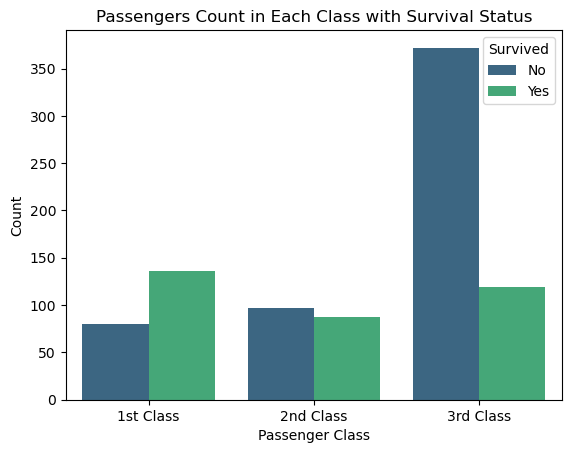

In [5]:
# now we can plt the count plot for passengers in each class
sns.countplot(x='pclass', data=df, hue='survived', palette='viridis')
plt.title('Passengers Count in Each Class with Survival Status')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xlabel('Passenger Class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.ylabel('Count')
plt.show()

### Survival by passenger class and gender: 
Explore survival rates based on the combination of passenger class and gender.

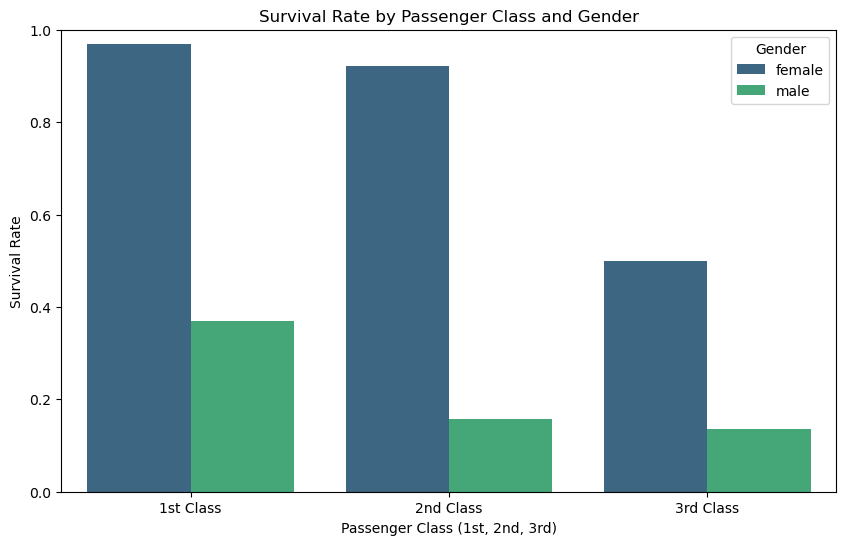

In [6]:
survival_by_class_gender = df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

# Visualize the survival rate by passenger class and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=survival_by_class_gender, palette='viridis')
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.show()


### Correlation analysis: 
Calculate the correlation matrix for the numerical features. Are there any strong correlations between features like 'fare' and 'pclass'?

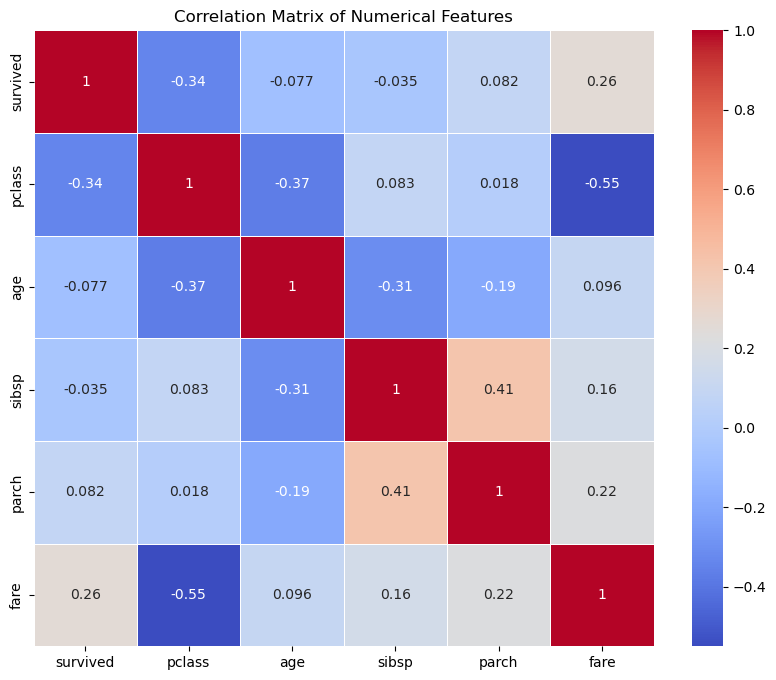

Correlation between 'fare' and 'pclass': -0.55


In [7]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Print the correlation between 'fare' and 'pclass'
fare_pclass_correlation = correlation_matrix['fare']['pclass']
print(f"Correlation between 'fare' and 'pclass': {fare_pclass_correlation:.2f}")

So, you can visualize different scenarios using those libraries. You can also use plotly for visualization. It is more advance and powerful library.